# ИССЛЕДОВАНИЕ РЫНКА ВИДЕОИГР
## Введение
Вы работаете в интернет-магазине «Стримчик», который продаёт видеоигры по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Важные замечания: 
- перед вами данные с 1980 до 2016 года;
- данные за 2016 год могут быть неполными.

Описание данных:
- Name — название игры;
- Platform — игровая платформа;
- Year_of_Release — год выпуска игры;
- Genre — жанр игры;
- NA_salesб, EU_sales, JP_sales — продажи игр в с.Америке, Европе и Японии (млн. копий);
- Other_sales — продажи игр в других странах (млн. копий);
- Critic_Score — оценка критиков (максимум 100);
- User_Score — оценка пользователей (максимум 10);
- Rating — рейтинг организации ESRB (англ. Entertainment Software Rating Board), определяющий возрастную категорию игры. 

## Постановка задачи
Необходимо выявить закономерности, определяющие успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании в 2017 году.
## План исследования
Шаг 1. Откройте файл с данными и изучите общую информацию

Шаг 2. Подготовьте данные:
- замените названия столбцов (приведите к нижнему регистру);
- преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- обработайте пропуски при необходимости:
    - объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - опишите причины, которые могли привести к пропускам;
    - обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
    - посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Шаг 3. Проведите исследовательский анализ данных:
- посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы;
- какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ;
- постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат;
- посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. Соотнесите выводы с продажами игр на других платформах;
- посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5). Опишите различия в долях продаж;
- самые популярные жанры (топ-5). Поясните разницу;
- влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверьте гипотезы
- средние пользовательские рейтинги платформ Xbox One и PC - одинаковые;
- средние пользовательские рейтинги жанров Action и Sports - разные.
- задайте самостоятельно пороговое значение alpha.
- поясните:
    - как вы сформулировали нулевую и альтернативную гипотезы;
    - какой критерий применили для проверки гипотез и почему.

Шаг 6. Напишите общий вывод
## Обзор данных
Загрузим данные, просмотрим первые 10 строк и общую информацию о датасете.

In [1]:
#Импортируем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt

In [2]:
#Загружаем данные из файла
data = pd.read_csv('/datasets/games.csv')

In [3]:
#Выводим первые строки датасета
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Имеются пропуски, несоответствие типов и др. Проведем предобработку данных.
## Предобработка данных
### Наименование столбцов
Приведем названия столбцов к нижнему регистру и проверим результат.

In [5]:
data.columns = data.columns.str.lower()

### Обработка дубликатов
Поищем явные дубликаты.

In [6]:
print('Явных дубликтов:', data.duplicated().sum())

Явных дубликтов: 0


Рассмотрим уникальные значения категориальных столбцов `platform`, `genre` и `rating` в поисках неявных дубликатов.

In [7]:
print('Уникальные значения',
      '\n - платформа:', data['platform'].sort_values().unique(),
      '\n\n - жанр:', data['genre'].sort_values().unique(),
      '\n\n - рейтинг ESRB:', data['rating'].sort_values().unique(),          
     )    

Уникальные значения 
 - платформа: ['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne'] 

 - жанр: ['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy' nan] 

 - рейтинг ESRB: ['AO' 'E' 'E10+' 'EC' 'K-A' 'M' 'RP' 'T' nan]


Неявные дубликаты отсутствуют.

Стобец `name` содержит гораздо больше уникальных вариантов, его проверим отдельно. Унифицируем наименования игр с помощью функции, приводящей к нижнему регистру и удаляющей лишние разделители между словами. Затем повторно проверим датасет на дубликаты по сочетанию унифицированного наименования, платформы, года выпуска и жанра.   

In [8]:
def unify(value):
    """Формирует и возвращает строку в нижнем регистре, 
    где слова разделены одним пробелом.
    
    Параметры:
    value -- значение для преобразований
    """
    if not isinstance(value, str):
        value = str(value)
    return ' '.join(value.lower().split())

In [9]:
data_to_check = data[['name', 'platform', 'year_of_release', 'genre']].copy()
data_to_check['name'] = data_to_check['name'].apply(unify)
data_to_check[data_to_check.duplicated()]

,name,platform,year_of_release,genre
14244,nan,GEN,1993.0,NaN
16230,madden nfl 13,PS3,2012.0,Sports


Избавимся от дубликатов в основном датасете и продолжим предобработку.

In [10]:
idx = data[data_to_check.duplicated()].index.values.tolist()
data = data.drop(idx).reset_index(drop=True)

### Обработка пропусков и преобразование типов
Посмотрим на пропуски и типы в масштабе всего датасета. Затем последовательно их разберем и обработаем.

In [11]:
data.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

In [12]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

#### Наименование и жанр
В колонках `name` и `genre` есть пропуски. Посмотрим, возможно они находятся в одной строке.

In [13]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


Так и есть. Как видно полезной информации здесь крайне мало. Восстановить ее не представляется возможным. Удалим эти пропуски.

In [14]:
data = data[~data['name'].isna()]

#### Год выпуска
В колонке `year_of_release` имеется 269 пропусков. Взглянем на них. 

In [15]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В названиях некоторых игр фигурирует год. Однако это не значит, что данная игра была выпущена на той или иной платформе в том же году. Например, "Madden NFL 2004" [по данным Википедии](https://en.wikipedia.org/wiki/Madden_NFL_2004) вышел на платформах GameCube, Microsoft Windows, PlayStation 2, PlayStation, Game Boy, Advance Xbox в 2003 году.  
Подобные пропуски можно заполнить с помощью альтернативного датасета-донора, сопоставив название и платформу. Однако, в нашем случае это нецелесообразно, т.к. количество пропусков мало (< 2%), а затраты на реализацию явно превысят эффект. Мы видим, что эти строки содержат полезные данные, значит, не стоит их удалять. Одновременно нам необходимо привести данные в столбце `year_of_release` к целочисленному типу.  
В качестве решения, промаркируем пропуски нулевым значением и приведем данные к типу int.

In [16]:
data['year_of_release'] = data['year_of_release'].fillna(0).astype('int')

#### Оценки критиков и пользователей,  рейтинг ESRB
Столбец `user_score` (оценка пользователей) заполнился данными типа `object`, хотя по аналогии с `critic_score` (оценка критиков) типом должен быть `float`. Посмотрим на уникальные значения `user_score`.

In [17]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Наряду с `NaN` и вещественными числами видим значение `tbd`, неприводимое к численному типу. Похоже, это аббревиатура, которая применительно к рейтингу обозначает to be determined. Т.е. не определен, подлежит дальнейшему определению. В нашем случае `tbd` нечем заменить, и в этом смысле данное значение не отличается от пропуска. В то же время оценки пользователей нам потребуются в числовом формате.  
В качестве решения, заменим `tbd` на `NaN` и приведем данные к нужному типу.

In [18]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')

Проверим предположение, что пропуски в оценках критиков и пользоваталей, а также рейтинге ESRB сопутствуют друг другу. 

In [19]:
condition = (data['critic_score'].isna()) &\
            (data['user_score'].isna()) &\
            (data['rating'].isna())
nans = data[condition]
nans

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Предположение подтвержается. Данная ситуация (`NaN` во всех трех столбцах) покрывает подавляющее большинство пропусков в пользовательских оценках и рейтинге ESRB, а также бОльшую часть пропусков в оценках критиков.  
Посмотрим как пропуски распределяются по годам. Возможно, они относятся к новинкам, которые просто не успели оценить, или, наоборот, к самым старым играм, где система рейтингов еще не сформировалась.

<AxesSubplot:title={'center':'Распределение игр без рейтинга по годам'}, xlabel='Год', ylabel='Количество игр, шт.'>

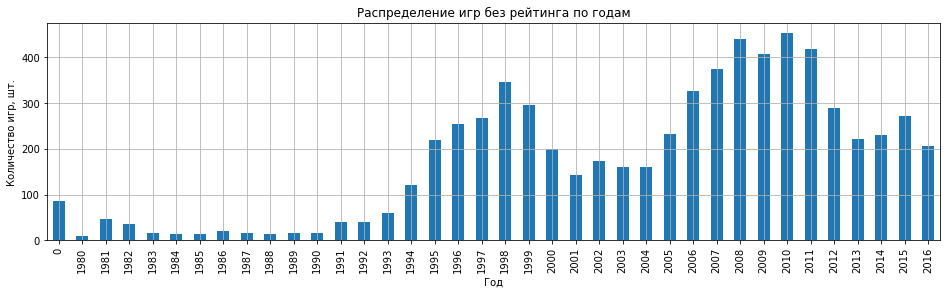

In [20]:
nans['year_of_release'].value_counts().sort_index().plot(kind='bar',                                                         
                                                         grid=True, 
                                                         figsize=(16, 4),
                                                         xlabel='Год',
                                                         ylabel='Количество игр, шт.',
                                                         title = 'Распределение игр без рейтинга по годам')

Подавляющее большинство пропусков распределено между 1994 и 2015 годом. Похоже, они не имеют отношения к новинкам или старым играм.  
Возможно более показательной окажется связь с популярностью игр (мало/нет пользователей и критиков - мало/нет оценок).

In [21]:
sales_col_names = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
nans.pivot_table(index='name', values=sales_col_names, aggfunc='sum').describe()

,eu_sales,jp_sales,na_sales,other_sales
count,5771.000000,5771.000000,5771.000000,5771.000000
mean,0.104800,0.145408,0.214089,0.025893
std,0.441498,0.436100,0.954364,0.121369
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.030000,0.000000,0.000000
75%,0.050000,0.120000,0.120000,0.010000
max,10.950000,10.220000,32.480000,3.490000


Действительно, несмотря на внушительные максимумы (до 10 миллионов в Европе и Японии, до 32 миллионов в с.Америке), 75% игр не преодолели порог в 120 тыс. проданных копий в Японии и с.Америке, и в 50 тыс. - в Европе. 50% игр в Европе и с.Америке показывают нулевые продажи.  

Мы не знаем, как собирались данные, и имеем целый ряд факторов, которые могли привести к столь многочисленным пропускам: 
- на заре игровой индустрии оценки и рейтинги какое-то время просто отсутствовали. Например, [организация ESRB](https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board) появилась лишь в 1994 году. Новинки же, возможно, еще не успели оценить;
- похоже, некоторые игры никто не заметил и они попросту не были оценены. Нет игроков - нет оценок; 
- в подавляющем большинстве случаев пропуски в оценке критиков и пользователей, а также рейтинге ESRB появляются одновременно, что может указывать на ошибку алгоритма на этапе сбора и объединения данных.

Похоже, мы наблюдаем совместное влияние всех перечисленных факторов и не можем однозначно определить механизм возникновения пропусков. Данные о количестве оценок могли бы нам помочь (если игра была оценена ноль раз, значит пропуск можно заполнить нулем баллов). Однако, таких данных у нас нет. Медианные, средние и т.д. значения нам не подходят, т.к. исказят картину.
Т.о., восстановление пропусков не представляется возможным. 

На текущем этапе исследования мы оставим данные, как есть. В дальнейшем, в зависимости от задачи и при необходимости, будем исключать из рассмотрения строки с пропусками.
### Проверка
Оценим результаты преобразований в наименовании столбцов...

In [22]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

...количестве пропусков...

In [23]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

...и типах данных.

In [24]:
data.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Преобразования прошли корректно.

### Расчет общих продаж 
Создадим столбец `total_sales` с данными об общем количестве продаж во всех регионах. Выведем первые пять строк датасета для проверки. 

In [25]:
data['total_sales'] = data[sales_col_names].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Преобразование прошло корректно.
## Исследовательский анализ данных
### Игровые релизы
Посмотрим сколько игр было выпущено в разные годы. Строки с нулевым значением года выпуска рассматривать не будем.

<AxesSubplot:title={'center':'Распределение игр по годам выпуска'}, xlabel='Год', ylabel='Выпущено игр, шт.'>

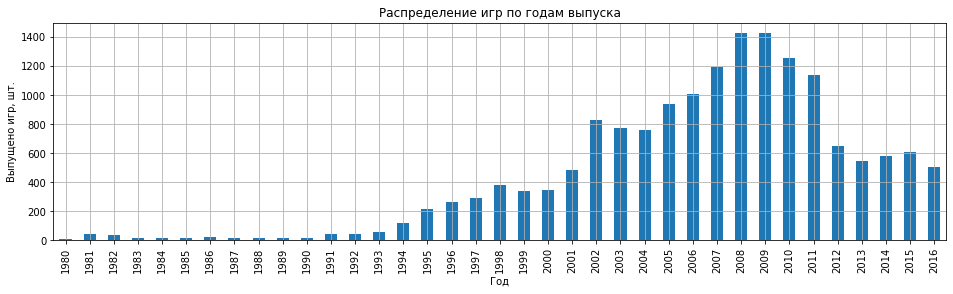

In [26]:
data.loc[data['year_of_release'] != 0, 'year_of_release'].value_counts()\
                                                         .sort_index()\
                                                         .plot(kind='bar', 
                                                               grid=True,
                                                               figsize=(16, 4),
                                                               xlabel='Год',
                                                               ylabel='Выпущено игр, шт.',
                                                               title='Распределение игр по годам выпуска')

С 1980 г. наблюдаем плавный рост с историческим максимумом (чуть более 1400 релизов) в 2008-2009 г.г. Начиная с 2010 г. - спад до 2013 с локальным ростом до 2015. Учитывая, что данные за 2016 год - неполные, дальнейший тренд может быть как положительным, так и отрицательным.  
### Игровые платформы
Посмотрим, как продажи распределились по платформам за все время наблюдений.

<AxesSubplot:title={'center':'Продажи игр по платформам за весь период наблюдений'}, xlabel='Платформа', ylabel='Продано игр, млн. копий'>

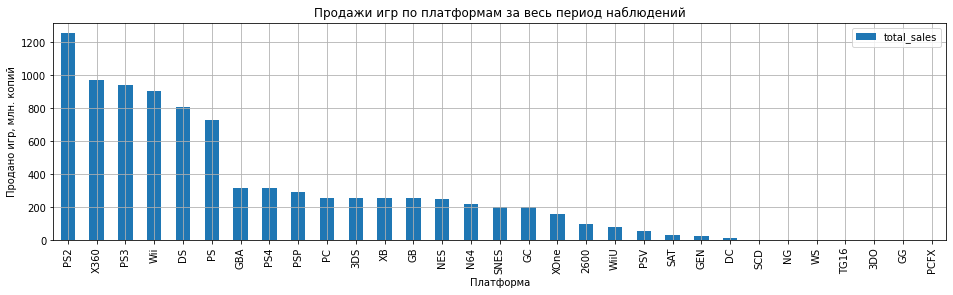

In [27]:
sales_by_plat = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
                    .sort_values(by='total_sales', ascending=False)
sales_by_plat.plot(kind='bar',
                   grid=True,
                   figsize=(16, 4),
                   xlabel='Платформа',
                   ylabel='Продано игр, млн. копий',
                   title='Продажи игр по платформам за весь период наблюдений')    

#### Лидеры продаж
Выберем пятерку лидеров и посмотрим, как продажи распределялись по годам. Для этого сформируем сводную таблицу и взглянем на первые несколько строк. 

In [28]:
top5_plats = list(sales_by_plat.head().index)
print('Top-5 игровых платформ по объему продаж', top5_plats)
sales_by_year_plat = data[data['year_of_release'] != 0].pivot_table(index=['year_of_release', 'platform'],
                                                                    values='total_sales',
                                                                    aggfunc='sum')\
                                                       .reset_index()
plat_top = sales_by_year_plat[sales_by_year_plat['platform'].isin(top5_plats)]
plat_top.head(15)

Top-5 игровых платформ по объему продаж ['PS2', 'X360', 'PS3', 'Wii', 'DS']


,year_of_release,platform,total_sales
8,1985,DS,0.02
94,2000,PS2,39.17
104,2001,PS2,166.43
113,2002,PS2,205.38
119,2003,PS2,184.31
121,2004,DS,17.27
125,2004,PS2,211.81
128,2005,DS,130.14
132,2005,PS2,160.66
134,2005,X360,8.25


Данные отсортированы по году в порядке возрастания. Обратим внимание на первую строку. В 1985 году было продано 20000 копий для платформы DS. Спустя 19 лет, в 2004 эта платформа появляется вновь и показывает ежегодные продажи. Судя по всему, речь о платформе [Nintendo DS](https://ru.wikipedia.org/wiki/Nintendo_DS), выпущенной в 2004 году, т.о. в 1985 игр для нее не могло существовать. Рассмотрим аномальные данные подробнее.

In [29]:
data[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15956,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Нашли единственную строку, которая дала те самые 20000 проданных копий. [Strongest Tokyo University Shogi DS](https://translate.google.com/?sl=auto&tl=en&text=Saikyou%20Toudai%20Shogi%0A&op=translate) или [Saikyou Toudai Shogi DS](https://gamefaqs.gamespot.com/ds/937837-saikyou-toudai-shogi-ds/data) - это игра для платформы DS, выпущенная в Японии в 2007 году. Исправим ошибку в данных, проверим результат и вернемся к исследованию.

In [30]:
data.loc[data['name'] == 'Strongest Tokyo University Shogi DS', 'year_of_release'] = 2007
data[data['name'] == 'Strongest Tokyo University Shogi DS']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15956,Strongest Tokyo University Shogi DS,DS,2007,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Ошибка исправлена.  
Сформируем сводную таблицу с уточненными данными и рассмотрим на диаграмме распределение продаж по годам.

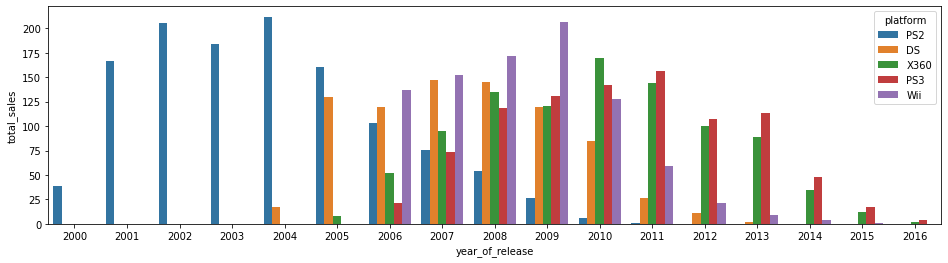

In [31]:
sales_by_year_plat = data[data['year_of_release'] != 0].pivot_table(index=['year_of_release', 'platform'],
                                                                    values='total_sales',
                                                                    aggfunc='sum')\
                                                       .reset_index()
plat_top = sales_by_year_plat[sales_by_year_plat['platform'].isin(top5_plats)]
fig, axes = plt.subplots(figsize=(16, 4))
sns.barplot(ax=axes, 
            data=plat_top,
            x="year_of_release", 
            y="total_sales", 
            hue="platform")
fig.show()

Распределение продаж для всех платформ походит на нормальное, имеет выраженые периоды подъема, пика и спада. Следовательно, сами платформы имеют некий цикл жизни, составляющий, судя по графику, 9-10 лет. PS2, DS и Wii, по состоянию на 2016 г., уже неактуальны, а PS3 и X360 - явно находятся в конце жизненного цикла.  
Справедливо предположить, что современные растущие игровые платформы в данном графике не отражены, т.к. еще не могут конкурировать с рассматриваемыми по объемам продаж. В дальнейшем исследовании мы определим и учтем такие актуальные платформы.
#### Жизненный цикл
Благодаря тому, что рассматриваемые платформы - лидеры продаж за всю историю, полностью или почти полностью завершили свой жизненный цикл, мы можем определить его среднюю продолжительность аналитически.

In [32]:
plat_life_cycle = plat_top.pivot_table(index='platform', 
                                       values='year_of_release', 
                                       aggfunc=['min', 'max'])
plat_life_cycle.columns = ['bol', 'eol']
mean = (plat_life_cycle['eol'] - plat_life_cycle['bol']).mean()
print('Средняя продолжительность жизненного цикла среди платформ-лидеров рынка составляет', mean, 'лет.')

Средняя продолжительность жизненного цикла среди платформ-лидеров рынка составляет 10.2 лет.


#### Перспективные 
Определим перспективные, развивающиеся игровые платформы. Ранее мы убедились, что среди лидеров рынка таковых нет. Для наглядности исключим их, и рассмотрим данные с 2011 года. 

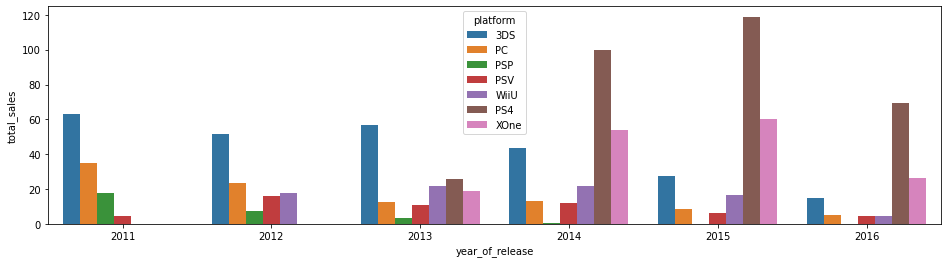

In [33]:
condition = (sales_by_year_plat['year_of_release'] > 2010) &\
            (~sales_by_year_plat['platform'].isin(top5_plats))
plat_actual = sales_by_year_plat[condition]
fig, axes = plt.subplots(figsize=(16, 4))
sns.barplot(ax=axes,
            data=plat_actual,
            x="year_of_release", 
            y="total_sales", 
            hue="platform")
fig.show()

Как отмечалось ранее, данные за 2016 год могут быть неполными, поэтому достоверным будем считать период до 2015 включительно. Платформы 3DS и PSP заканчивают жизненный цикл. PSV и WiiU, несмотря на относительную новизну, не показали бурного роста, а к 2015 году демонстрируют падение. Платформа PC так же не выглядит перспективной.  
В то же время PS4 и XOne (представлены в 2013 году), находясь в 1й половине жизненного цикла и показывая рост продаж, являются потенциально прибыльными.
### Выбор актуального периода
Для дальнейшего исследования необходимо выделить из всей истории налбюдений некий период, позволяющий сделать предположения относительно 2017 года. Этот период должен отражать текущие тренды игровой индустрии в объеме выпуска, продажах игр, а также акутальных игровых платформах.  
Сосредоточимся на данных, начиная с 2013 года. Этот период представляется наиболее актуальным по двум причинам: 
 - с 2013 количество выпускаемых игр с каждым годом растет, задавая тренд. Вполне возможно, этот рост продолжится и в 2016 году (нужны полные данные);
 - в 2013 году были выпущены потенциально наиболее прибыльные игровые платформы PS4 и XOne. С 2014 года они являются лидерами продаж.

In [34]:
data2013 = data[data['year_of_release'] > 2012]

### Диаграмма размаха игровых продаж 
Рассмотрим суммарные продажи игр по разным платформам в формате диаграммы размаха.

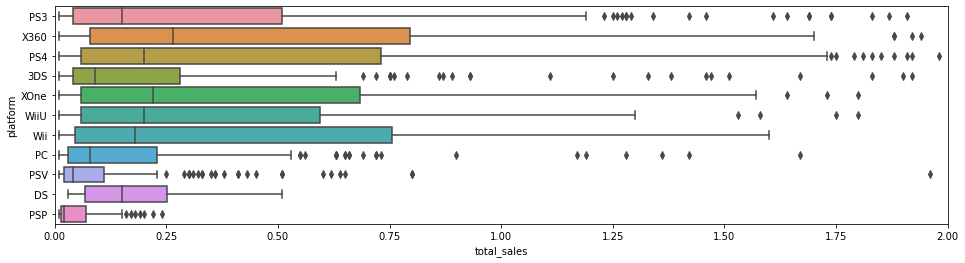

In [35]:
fig, axis = plt.subplots(figsize=(16, 4))
a = sns.boxplot(ax=axis, data=data2013, x='total_sales', y='platform')
a.set_xlim(0, 2)
fig.show()

Обратим внимание на две особенности, характерные для всех платформ. 
1. Отрезок Q2-Q3 (медиана-3й квартиль) в разы превышает отрезок Q1-Q2 (1й квартиль-медиана). Это значит, что игры из второй половины выбоки имеют больший разброс и гораздо сильнее отличаются друг от друга по продажам, нежели игры первой половины.
2. Множество "выбросов" указывает не на аномалии, а на эффект, характерный для высококонкурентных массовых продаж: на фоне общей массы выделяются абсолютные хиты. 

### Влияние оценки пользователей и критиков на продажи
Оценим, как на продажи влияют отзывы пользователей и критиков. Для этого выберем 3 популярные платформы: PS4, XOne и X360. Чтобы получить более качественную картину, очистим данные от строк:
 - с пропусками и значением-маркером (-1) в оценке пользователей;
 - с пропусками в оценке критиков.

In [36]:
condition = ~((data2013['user_score'].isna()) | (data2013['critic_score'].isna()))
sales_by_score = data2013[condition]

In [37]:
def display_corr(data, platform):
    """По данным датасета строит для игровой платформы: 
     - матрицу корреляции для оценок пользователей, критиков и суммарных продаж;
     - диаграмму рассеяния для оценок пользователей и суммарных продаж;
     - диаграмму рассеяния для оценок критиков и суммарных продаж.
    
    Параметры:
    data -- датасет с данными
    platform -- наименование игровой плаформы
    """
    d = data.loc[data['platform'] == platform, ['critic_score', 'user_score', 'total_sales']]
    print('Матрица корреляции для', platform)
    display(d.corr())
    print('Диаграммы соответствия продаж оценкам пользователей и критиков для', platform)
    fig, axis = plt.subplots(1, 2, figsize=(16,4))
    sns.scatterplot(ax=axis[0], x='user_score', y='total_sales', data=d, alpha=0.6)
    sns.scatterplot(ax=axis[1], x='critic_score', y='total_sales', data=d, alpha=0.6)
    fig.show()

Матрица корреляции для PS4


,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
total_sales,0.405895,-0.033625,1.000000


Диаграммы соответствия продаж оценкам пользователей и критиков для PS4


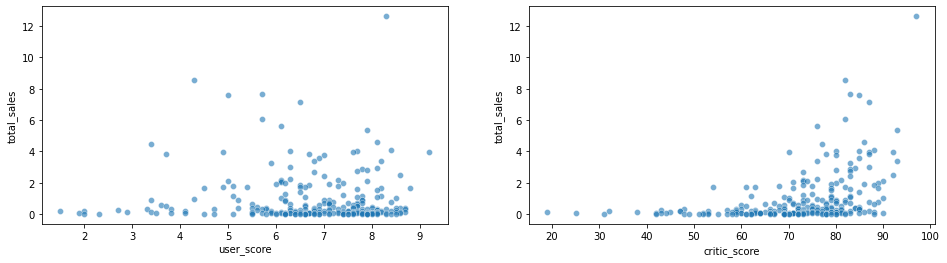

In [38]:
display_corr(sales_by_score, 'PS4')

Матрица корреляции для XOne


,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.410422
user_score,0.472462,1.000000,-0.094003
total_sales,0.410422,-0.094003,1.000000


Диаграммы соответствия продаж оценкам пользователей и критиков для XOne


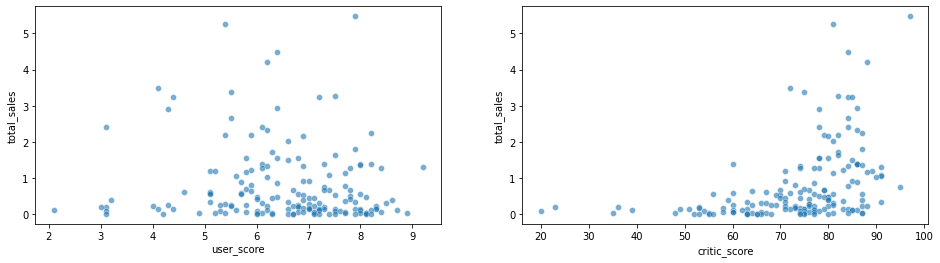

In [39]:
display_corr(sales_by_score, 'XOne')

Матрица корреляции для X360


,critic_score,user_score,total_sales
critic_score,1.000000,0.520946,0.350345
user_score,0.520946,1.000000,-0.006238
total_sales,0.350345,-0.006238,1.000000


Диаграммы соответствия продаж оценкам пользователей и критиков для X360


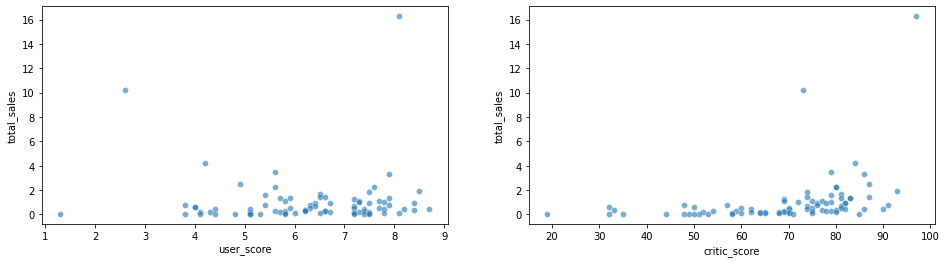

In [40]:
display_corr(sales_by_score, 'X360')

На диаграммах рассеяния для всех трех платформ просматривается некое лиенйное соответствие, однако сложно назвать его выраженным. Корреляция для PS4, XOne и X360 между продажами:
 -  и оценками критиков - положительная, невысокая, с коэффициентами: 0.406, 0.410 и 0.350 соответственно;
 -  и оценками пользователей - отрицательная, околонулевая, с коэффициентами: -0.033, -0.094 и -0.006 соответственно.

Отсюда можно сделать следующие выводы: 
 - часто игры со средними оценками продаются хорошо. И наоборот: игры с высокими оценками продаются средне;
 - высокая оценка критиков в ряде случаев соответствует высоким продажам игры;
 - оценка пользователей практически не влияет на продажи.

Слабое (или отсутствующее) влияние оценок на продажи - контринтуитивно и требует проверки на данных из альтернативных источников. 
### Распределение игр по жанрам
Рассмотрим, как игровые жанры распределены по объему релизов и медианному объему продаж.

Распределение игровых жанров по объему выпуска и медианному объему продаж


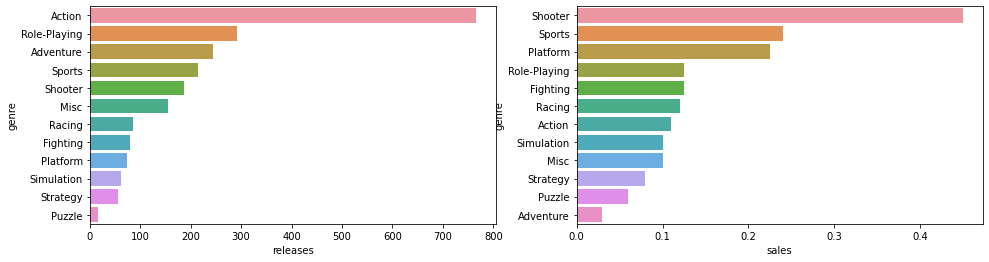

In [41]:
sales_by_gen = data2013.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'median']).reset_index()
sales_by_gen.columns = ['genre', 'releases', 'sales']

print('Распределение игровых жанров по объему выпуска и медианному объему продаж')
fig, axes = plt.subplots(1, 2, figsize=(16,4))
sns.barplot(ax=axes[0], 
            x='releases', 
            y='genre', 
            data=sales_by_gen.sort_values(by='releases', ascending=False))
sns.barplot(ax=axes[1], 
            x='sales',
            y='genre',
            data=sales_by_gen.sort_values(by='sales', ascending=False))
fig.show()

По объему выпуска лидируют жанры Action, Role-Playing, Adventure, Sports и Shooter. Минимальные объемы выпуска, в порядке убывания, показывают Simulation, Strategy и Puzzle.  
При этом наиболее продаваемые жанры - Shooter, Sports, Platform, Role-Playing и Fighting. Минимальные объемы продаж в порядке убывания показывают Strategy, Puzzle и Adventure.  
По совокупности характеристик, жанры Shooter, Sports и Platform выглядят наиболее потенциально прибыльными.
### Региональный портрет пользователя
#### Популярные платформы
Для каждого региона (NA, EU, JP) выберем 5 наиболее популярных платформ и оценим их доли в общем объеме продаж.

In [42]:
def display_market_share(data, by, top5=True):
    """Строит по данным датасета круговые диаграммы продаж 
    для рынков с.Америки, Европы и Японии.

    Параметры:
    data -- датасет с данными о продажах
    by -- признак для подсчета продаж (platform, genre, rating...)    
    top5 -- флаг пятерки лидеров (default True). 
            True - продажи рассчитываются среди top-5 признака by по убыванию. 
            False - продажи рассчитываются среди всех значений by.
    """
    d = data.pivot_table(index=by, values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
    if top5:
        na = d.sort_values(by='na_sales', ascending=False).head()
        eu = d.sort_values(by='eu_sales', ascending=False).head()
        jp = d.sort_values(by='jp_sales', ascending=False).head()        
    else:
        na = d.sort_values(by='na_sales', ascending=False)
        eu = d.sort_values(by='eu_sales', ascending=False)
        jp = d.sort_values(by='jp_sales', ascending=False)
        
    fig, axes = plt.subplots(1, 3, figsize=(16,5))
    axes[0].pie(x=na['na_sales'], labels=na[by], autopct='%.2f%%')
    axes[1].pie(x=eu['eu_sales'], labels=eu[by], autopct='%.2f%%')
    axes[2].pie(x=jp['jp_sales'], labels=jp[by], autopct='%.2f%%')
    fig.show()

Объем продаж в долях рынка среди top-5 платформ в с.Америке, Европе и Японии


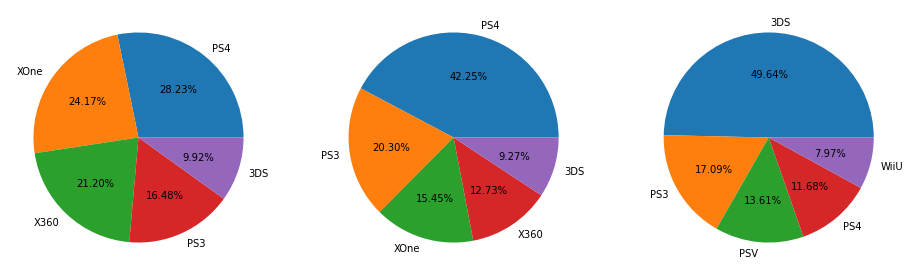

In [43]:
print('Объем продаж в долях рынка среди top-5 платформ в с.Америке, Европе и Японии')
display_market_share(data2013, 'platform')

В с.Америке лидируют перспективные PS4 (28.32%) и XOne (24.17%), занимая чуть более половины рынка, заметная доля принадлежит X360 (21,20%). PS3 (16.48%) и 3DS (9.92%) замыкают пятерку лидеров.

В Европе перспективным платформам PS4 и XOne (42.25% и 15.45% соответственно) принадлежит почти 60% рынка с заметным перевесом в пользу PS4. Пятая часть (20.3%) - за платформой PS3. X360 (12.73%) и 3DS (9.27%) замыкают пятерку лидеров.

В Японии половина рынка принадлежит единственной платформе - 3DS (49.64%). Около 30% - за PS3 (17.09%) и PSV (13.61%). Перспективная PS4 занимает всего 11.68%. Замыкает пятерку WiiU (7.97%). 

Рынки с.Америки и Европы схожи в приверженности к современным, перспективным платформам PS4 и XOne. При этом заметное место в структуре продаж играют и "доживающие" платформы (X360, PS3, 3DS). Японский рынок - гораздо более консервативен: PS4 занимает чуть больше 10% рынка, а XOne - вовсе отсутсвует.
#### Популярные жанры
Для каждого региона (NA, EU, JP) выберем 5 наиболее популярных жанров и оценим их доли в общем объеме продаж.

Объем продаж в долях рынка среди top-5 игровых жанров в с.Америке, Европе и Японии


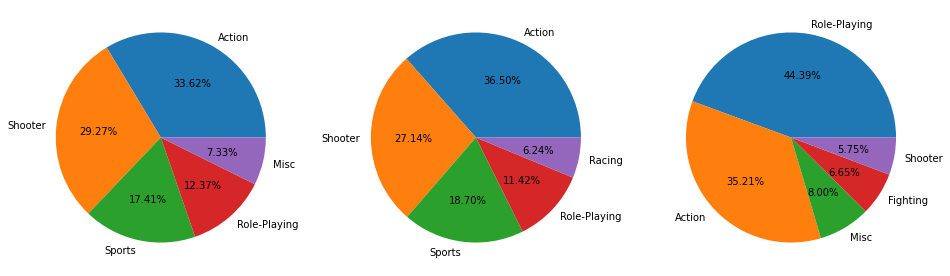

In [44]:
print('Объем продаж в долях рынка среди top-5 игровых жанров в с.Америке, Европе и Японии')
display_market_share(data2013, 'genre')

Рынки с.Америки и Европы почти не отличаются количественно и качественно. Жанры Action и Shooter занимают около 63%, Sports - около 18%, Role-Playing - около 12%. Приблизительно 7% приходится на Misc - в с.Америке и Racing - в Европе. Это и есть единственное значимое отличие между данными регионами.  

Япония демонстрирует принципально иную картину. Наиболее популярный жанр - Role-Playing (44.39%). Доля Action (35.24%) схожа с Европейским (36.50%) и с.Американским (33.62%) рынком. Замыкают пятерку жанров: Misc (8%), Fighting (6.65%) и Shooter, с минимальной долей - 5.75%. Жанры Sports и Racing в Японии не представлены.

Похоже, жанровая структура обусловлена культурно-историческими особенностями регионов:
 - весьма схожими, в случае с.Америки и Европы;
 - и отличными, в случае Японии.
 
#### Влияние рейтинга ESRB 
Рейтинг [ESRB](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board) актуален для с.Американского региона. В Европе используется рейтинг [PEGI](https://ru.wikipedia.org/wiki/Pan_European_Game_Information), а в Японии - [CERO](https://ru.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization). Т.о., для многих игровых релизов рейтинга ESRB может не быть, что подтверждается внушительным количеством пропусков в нашем датасете. В данной части исследования поробуем  учесть эти пропуски, предварительно промаркировав их значением `unknown`.

Объем продаж в долях рынка среди рейтингов ESRB в с.Америке, Европе и Японии


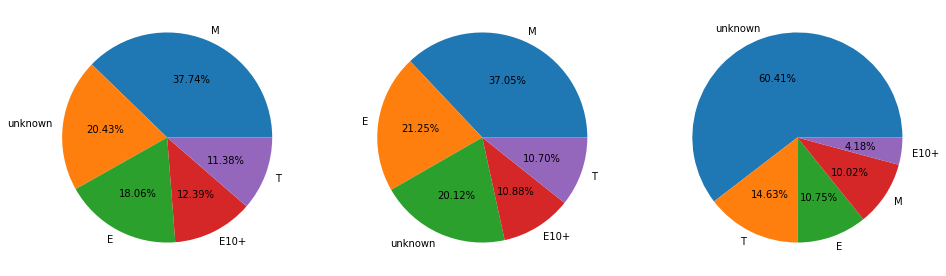

In [45]:
data2013_rating = data2013.copy()
data2013_rating['rating'] = data2013_rating['rating'].fillna('unknown')
print('Объем продаж в долях рынка среди рейтингов ESRB в с.Америке, Европе и Японии')
display_market_share(data2013_rating, 'rating', top5=False)

Расшифровка рейтингов ESRB по [данным](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board) Википедии: 
 - «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults");
 - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови;
 - «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики;
 - «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
 
Кроме того, для неизвестного рейтинга мы используем значение-маркер `unknown`. 
 
Рынки с.Америки и Европы отличаются незначительно и демонстрируют схожие доли продаж по всем рейтингам. В Японии принципиально иная картина: ~60% продаж приходится на релизы с неизвестным рейтингом ESRB, что лишний раз указывает на обособленность данного рынка. Вероятно, это также связано с активным использованием национальной рейтинговой системы CERO. 
## Статистический анализ данных
Для дальнейшей проверки гипотез очистим датасет от строк с пропусками в пользовательских оценках. 

In [46]:
usr_score = data2013[~data2013['user_score'].isna()]

Статистическую значимость гипотез будем проверять с помощью Т критерия для двух независимых выборок, функцией `ttest_ind(a, b, equal_var=True)` из библиотеки `scipy.stats`, где: 
 - `a` и `b`: независимые выборки;
 - `equal_var`: флаг равенства выборочных дисперсий (по умолчанию True). При `equal_var=True`, применяется Т критерий Стьюдента, предполагающий равные дисперсии сравниваемых генеральных совокупностей. При `equal_var=False`, применяется Т критерий Уэлча, предполагающий неравные дисперсии сравниваемых генеральных совокупностей.

Т.о., для корректной оценки необходимо узнать дисперсии сравниваемых выборок. Так же не помешает предварительно оценить выборочные средние и количество наблюдений. Установим пороговое значение статистической значимости - 5% и создадим функции, которые облегчат дальнейшие расчеты.

In [47]:
alpha = 0.05

In [48]:
def usr_score_mean_var(data, col_name, col_values):
    """Для каждого значения col_values из столбца col_name
    возвращает Series с пользовательскими оценками из датасета data. 
    Для каждого набора оценок выводит на экран количество, 
    среднее значение и дисперсию.

    Параметры:
    data -- датасет с данными
    col_name -- наименование столбца (platform, genre...)
    col_values -- список значений из столбца col_name
    """
    result = []
    for col_value in col_values:
        d = data[data[col_name] == col_value]['user_score']
        print('Пользовательские оценки для',
          col_name, '=', col_value, '\n',
         ' - количество:', d.count(), '\n',        
         ' - среднее:', d.mean(), '\n',
         ' - дисперсия:', d.var())
        result.append(d)                
    return result

In [49]:
def perform_ttest(alpha, a, b, eq_var=True):
    """Проводит t-тест для двух независимых выборок. Выводит на экран 
    занчение pvalue и решение относительно нулевой гипотезы.

    Параметры:
    alpha -- порог значимости 
    a -- первая выборка 
    b -- вторая выборка 
    eq_var -- флаг равенства выборочных дисперсий (default True)
    """
    result = st.ttest_ind(a, b, equal_var=eq_var)
    pval = round(result.pvalue, 4)
    print('pvalue:', pval)
    if pval > alpha:
        print('Не отвергаем нулевую гипотезу.')
    else:
        print('Отвергаем нулевую гипотезу.')

### Пользовательские рейтинги платформ 
Сформулируем гипотезы, нулевую и альтернативную:
 - H0, средние пользовательские оценки игр для платформ XOne и PC <b>равны</b>;
 - H1, средние пользовательские оценки игр для платформ XOne и PC <b>не равны</b>.

Оценим выборочные средие и дисперсии. 

In [50]:
scores = usr_score_mean_var(usr_score, 'platform', ['XOne', 'PC'])

Пользовательские оценки для platform = XOne 
  - количество: 182 
  - среднее: 6.521428571428572 
  - дисперсия: 1.9069968429360695
Пользовательские оценки для platform = PC 
  - количество: 155 
  - среднее: 6.2696774193548395 
  - дисперсия: 3.035892752408882


Выборочные дисперсии различаются на единицу, но не в разы. Т.о., разброс выборок сопоставим. Используем значение по умолчанию `True` для флага `equal_var`.

In [51]:
xone_usr_score = scores[0]
pc_usr_score = scores[1]
perform_ttest(alpha, xone_usr_score, pc_usr_score)

pvalue: 0.1401
Не отвергаем нулевую гипотезу.


Любопытно, что при значении `equal_var=False`, мы получим тот же результат. 

In [52]:
perform_ttest(alpha, xone_usr_score, pc_usr_score, eq_var=False)

pvalue: 0.1476
Не отвергаем нулевую гипотезу.


Проведенный анализ дает основание утверждать, что средние пользовательские оценки игр для платформ XOne и PC равны.
### Пользовательские рейтинги жанров 
Сформулируем гипотезы, нулевую и альтернативную:
 - H0, средние пользовательские оценки игр в жанрах Action и Sports <b>равны</b>;
 - H1, средние пользовательские оценки игр в жанрах Action и Sports <b>не равны</b>.

In [53]:
scores = usr_score_mean_var(usr_score, 'genre', ['Action', 'Sports'])

Пользовательские оценки для genre = Action 
  - количество: 389 
  - среднее: 6.837532133676092 
  - дисперсия: 1.7693609042482705
Пользовательские оценки для genre = Sports 
  - количество: 160 
  - среднее: 5.238124999999999 
  - дисперсия: 3.180612814465409


Выборочные дисперсии различаются, но не в разы. Т.о., разброс выборок сопоставим. Используем значение по умолчанию `True` для флага `equal_var`.

In [54]:
action_usr_score = scores[0]
sports_usr_score = scores[1]
perform_ttest(alpha, action_usr_score, sports_usr_score)

pvalue: 0.0
Отвергаем нулевую гипотезу.


Любопытно, что при значении `equal_var=False`, мы получим тот же результат. 

In [55]:
perform_ttest(alpha, action_usr_score, sports_usr_score, eq_var=False)

pvalue: 0.0
Отвергаем нулевую гипотезу.


Проведенный анализ дает основание утверждать, что средние пользовательские оценки игр в жанрах Action и Sports не равны.
## Выводы
### Предобработка данных
В ходе предобработки данных были: 
 - переименованы столбцы (см. [5.1](#%D0%9D%D0%B0%D0%B8%D0%BC%D0%B5%D0%BD%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5-%D1%81%D1%82%D0%BE%D0%BB%D0%B1%D1%86%D0%BE%D0%B2))
 - устранены неявные дубликаты (см. [5.2](#%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0-%D0%B4%D1%83%D0%B1%D0%BB%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D0%B2)),
 - частично заполнены пропуски и скорректированы типы данных (см. [5.3](#%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0-%D0%BF%D1%80%D0%BE%D0%BF%D1%83%D1%81%D0%BA%D0%BE%D0%B2-%D0%B8-%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5-%D1%82%D0%B8%D0%BF%D0%BE%D0%B2)),
 - добавлен новый признак - `total_sales`, суммарные продажи во всех регионах (см. [5.5](#%D0%A0%D0%B0%D1%81%D1%87%D0%B5%D1%82-%D0%BE%D0%B1%D1%89%D0%B8%D1%85-%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6)).
 
В исходных данных обнаружено множество пропусков, механизм возникновения которых не удалось однозначно установить (см. [5.3.3](#%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B8-%D0%BA%D1%80%D0%B8%D1%82%D0%B8%D0%BA%D0%BE%D0%B2-%D0%B8-%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9,--%D1%80%D0%B5%D0%B9%D1%82%D0%B8%D0%BD%D0%B3-ESRB)). Одновременно, строки с пропусками содержали полезную информацию и были оставлены, как есть. В ходе исследования, при необходимости, они исключались из рассмотрения или дополнительно обрабатывались.
### Исследовательский анализ
В ходе исследовательского анализа было показано следующее:
- с 2013 г. наблюдается рост количества игровых релизов. Учитывая, что данные за 2016 год - неполные, дальнейший тренд может быть как положительным, так и отрицательным  (см. [6.1](#%D0%98%D0%B3%D1%80%D0%BE%D0%B2%D1%8B%D0%B5-%D1%80%D0%B5%D0%BB%D0%B8%D0%B7%D1%8B));
- top-5 платформ по количеству проданных игр за всю историю наблюдений: PS2, X360, PS3, Wii, DS (см. [6.2.1](#%D0%9B%D0%B8%D0%B4%D0%B5%D1%80%D1%8B-%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6));
- игровые платформы имеют жизненный цикл средней продолжительностью (на примере top-5 платформ) около 10 лет (см. [6.2.2](#%D0%96%D0%B8%D0%B7%D0%BD%D0%B5%D0%BD%D0%BD%D1%8B%D0%B9-%D1%86%D0%B8%D0%BA%D0%BB));
- платформы из top-5 по состоянию на 2016 г. не актуальны (PS2, DS и Wii), либо находятся в конце жизненного цикла (PS3, X360) (см. [6.2.2](#%D0%96%D0%B8%D0%B7%D0%BD%D0%B5%D0%BD%D0%BD%D1%8B%D0%B9-%D1%86%D0%B8%D0%BA%D0%BB));
- PS4 и XOne являются потенциально прибыльными игровыми платформами (см. [6.2.3](#%D0%9F%D0%B5%D1%80%D1%81%D0%BF%D0%B5%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D1%8B%D0%B5));
- актуальный период начинается с 2013 года (см. [6.3](#%D0%92%D1%8B%D0%B1%D0%BE%D1%80-%D0%B0%D0%BA%D1%82%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B3%D0%BE-%D0%BF%D0%B5%D1%80%D0%B8%D0%BE%D0%B4%D0%B0));
- для рынка видеоигр характерено появление выделяющихся на общем фоне, абсолютных хитов (см. [6.4](#%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0-%D1%80%D0%B0%D0%B7%D0%BC%D0%B0%D1%85%D0%B0-%D0%B8%D0%B3%D1%80%D0%BE%D0%B2%D1%8B%D1%85-%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6));
- оценка критиков слабо влияет, а оценка пользователей практически не влияет на продажи игр. Эти выводы требуют проверки на данных из альтернативных источников (см. [6.5](#%D0%92%D0%BB%D0%B8%D1%8F%D0%BD%D0%B8%D0%B5-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B8-%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9-%D0%B8-%D0%BA%D1%80%D0%B8%D1%82%D0%B8%D0%BA%D0%BE%D0%B2-%D0%BD%D0%B0-%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6%D0%B8));
- с учетом объема релизов и продаж жанры Shooter, Sports и Platform потенциально наиболее прибыльны. (см. [6.6](#%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5-%D0%B8%D0%B3%D1%80-%D0%BF%D0%BE-%D0%B6%D0%B0%D0%BD%D1%80%D0%B0%D0%BC));
- рынки с.Америки и Европы тяготеют к перспективным платформам PS4 и XOne, заметное место в структуре продаж занимают "доживающие" платформы (X360, PS3, 3DS). Японский рынок - гораздо более консервативен: PS4 занимает чуть больше 10% рынка, а XOne - вовсе отсутсвует (см. [6.7.1](b#%D0%9F%D0%BE%D0%BF%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D1%8B%D0%B5-%D0%BF%D0%BB%D0%B0%D1%82%D1%84%D0%BE%D1%80%D0%BC%D1%8B));
- жанры Action, Shooter и Sports наиболее популярны в с.Америке и Европе. Япония демонстрирует своеобразие: жанры Role-Playing (44.39%) и Action (35.24%) делят около 80% рынка (см. [6.7.2](#%D0%9F%D0%BE%D0%BF%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D1%8B%D0%B5-%D0%B6%D0%B0%D0%BD%D1%80%D1%8B));
- с.Америка и Европа демонстрируют схожие доли продаж по всем рейтингам ESRB. В Японии ~60% продаж приходится на релизы с неизвестным рейтингом ESRB. Вероятно, это связано с активным использованием национальной рейтинговой системы CERO (см. [6.7.3](#%D0%92%D0%BB%D0%B8%D1%8F%D0%BD%D0%B8%D0%B5-%D1%80%D0%B5%D0%B9%D1%82%D0%B8%D0%BD%D0%B3%D0%B0-ESRB)).

### Статистический анализ
В ходе статистического анализа было показано следующее:
- получено основание утверждать, что средние пользовательские оценки игр для платформ XOne и PC равны (см. [7.1](#%D0%9F%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B5-%D1%80%D0%B5%D0%B9%D1%82%D0%B8%D0%BD%D0%B3%D0%B8-%D0%BF%D0%BB%D0%B0%D1%82%D1%84%D0%BE%D1%80%D0%BC));
- получено основание утверждать, что средние пользовательские оценки игр в жанрах Action и Sports не равны (см. [7.2](#%D0%9F%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B5-%D1%80%D0%B5%D0%B9%D1%82%D0%B8%D0%BD%D0%B3%D0%B8-%D0%B6%D0%B0%D0%BD%D1%80%D0%BE%D0%B2)).